[View in Colaboratory](https://colab.research.google.com/github/zronyj/matematica/blob/master/FactorizacionDiagonalizacion.ipynb)

# ¡Te volvemos a dar la bienvenida a un cuaderno interactivo de Colaboratory!

En esta ocasión vamos a ir directamente al grano y comenzar a trabajar con matrices de Hückel. Según la práctica de laboratorio, una matriz de Hückel se construye para moléculas con enlaces $\pi$ en resonancia. Para ello vamos a comenzar con un ejemplo sencillo: una molécula de **benceno**.

La matriz para el benceno va a tener 6 columnas y 6 filas, pues son solo 6 los átomos que cuentan con enlaces $\pi$ en resonancia. Siguiendo con lo propuesto, la diagonal principal se debe llenar con valores $\alpha$ que representan la energía de ionización del orbital **p**, y luego se deben de colocar $\beta$ en aquella combinación de fila-columna en donde se encuentre un enlace.

Por ejemplo, la fila 1, columna 2 representa al átomo de carbono 1 y el átomo de carbono 2 en la molécula de benceno. De estos podemos esperar que haya un enlace, por lo que colocamos un $\beta$ en esa entrada de la matriz. Siguiendo así terminaríamos con la siguiente matriz:

$$\mathbf{H} = \left [ \begin{matrix}
\alpha & \beta & 0 & 0 & 0 & \beta\\ 
\beta & \alpha & \beta & 0 & 0 & 0\\ 
0 & \beta & \alpha & \beta & 0 & 0\\ 
0 & 0 & \beta & \alpha & \beta & 0\\ 
0 & 0 & 0 & \beta & \alpha & \beta\\ 
\beta & 0 & 0 & 0 & \beta & \alpha
\end{matrix} \right ]$$


Sin embargo, al colocar esto dentro de la ecuación de valores propios, resulta que se puede manipular más este problema para facilitar su resolución.

$$\left [ \begin{matrix}
\alpha & \beta & 0 & 0 & 0 & \beta\\ 
\beta & \alpha & \beta & 0 & 0 & 0\\ 
0 & \beta & \alpha & \beta & 0 & 0\\ 
0 & 0 & \beta & \alpha & \beta & 0\\ 
0 & 0 & 0 & \beta & \alpha & \beta\\ 
\beta & 0 & 0 & 0 & \beta & \alpha
\end{matrix} \right ] \cdot
\left [ \begin{matrix}
c_1\\ 
c_2\\ 
c_3\\ 
c_4\\ 
c_5\\ 
c_6
\end{matrix} \right ] =
\left [ \begin{matrix}
E_1 & 0 & 0 & 0 & 0 & 0\\ 
0 & E_2 & 0 & 0 & 0 & 0\\ 
0 & 0 & E_3 & 0 & 0 & 0\\ 
0 & 0 & 0 & E_4 & 0 & 0\\ 
0 & 0 & 0 & 0 & E_5 & 0\\ 
0 & 0 & 0 & 0 & 0 & E_6
\end{matrix} \right ] \cdot
\left [ \begin{matrix}
c_1\\ 
c_2\\ 
c_3\\ 
c_4\\ 
c_5\\ 
c_6
\end{matrix} \right ]$$

Entonces, factorizando un poco y dividiendo entre $\beta$, se puede tener la siguiente situación:

$$\left [ \begin{matrix}
\frac{\left ( \alpha - E \right )}{\beta}& 1 & 0 & 0 & 0 & 1\\ 
1 & \frac{\left ( \alpha - E \right )}{\beta} & 1 & 0 & 0 & 0\\ 
0 & 1 & \frac{\left ( \alpha - E \right )}{\beta} & 1 & 0 & 0\\ 
0 & 0 & 1 & \frac{\left ( \alpha - E \right )}{\beta} & 1 & 0\\ 
0 & 0 & 0 & 1 & \frac{\left ( \alpha - E \right )}{\beta} & 1\\ 
1 & 0 & 0 & 0 & 1 & \frac{\left ( \alpha - E \right )}{\beta}
\end{matrix} \right ] \cdot
\left [ \begin{matrix}
c_1\\ 
c_2\\ 
c_3\\ 
c_4\\ 
c_5\\ 
c_6
\end{matrix} \right ] = 0$$

Si definimos $x_i = \frac{E_i - \alpha}{\beta}$, entonces es posible reescribir la anterior ecuación como:

$$\left [ \begin{matrix}
-x_1& 1 & 0 & 0 & 0 & 1\\ 
1 & -x_2 & 1 & 0 & 0 & 0\\ 
0 & 1 & -x_3 & 1 & 0 & 0\\ 
0 & 0 & 1 & -x_4 & 1 & 0\\ 
0 & 0 & 0 & 1 & -x_5 & 1\\ 
1 & 0 & 0 & 0 & 1 & -x_6
\end{matrix} \right ] \cdot
\left [ \begin{matrix}
c_1\\ 
c_2\\ 
c_3\\ 
c_4\\ 
c_5\\ 
c_6
\end{matrix} \right ] = 0$$

Lo cual es simplemente el problema de valores propios del que partimos, pero con $E_i = \alpha + x_i \beta$.

$$\left [ \begin{matrix}
0 & 1 & 0 & 0 & 0 & 1\\ 
1 & 0 & 1 & 0 & 0 & 0\\ 
0 & 1 & 0 & 1 & 0 & 0\\ 
0 & 0 & 1 & 0 & 1 & 0\\ 
0 & 0 & 0 & 1 & 0 & 1\\ 
1 & 0 & 0 & 0 & 1 & 0
\end{matrix} \right ] \cdot
\left [ \begin{matrix}
c_1\\ 
c_2\\ 
c_3\\ 
c_4\\ 
c_5\\ 
c_6
\end{matrix} \right ] =
x_i \cdot
\left [ \begin{matrix}
c_1\\ 
c_2\\ 
c_3\\ 
c_4\\ 
c_5\\ 
c_6
\end{matrix} \right ]$$

Ahora vamos a proceder a resolver el problema de valores propios, y así encontrar los valores de energía del sistema. Lo primero que vamos a intentar será descomponer la matriz $\mathbf{H}$ en matrices $Q$ y $R$.

In [0]:
# Ejecuta esta celda sin realizar cambios en ella
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.set_printoptions(suppress=True)

In [0]:
# Creamos la matriz H de la molecula de benceno
benceno = np.array([[0,1,0,0,0,1],
                    [1,0,1,0,0,0],
                    [0,1,0,1,0,0],
                    [0,0,1,0,1,0],
                    [0,0,0,1,0,1],
                    [1,0,0,0,1,0]])

In [28]:
# Calculamos las matrices Q y R a partir de la matriz de Huckel del benceno
q, r = LA.qr(benceno)
np.around(q, decimals=4)

array([[ 0.    ,  0.7071,  0.    , -0.4082,  0.    , -0.5774],
       [-0.7071, -0.    , -0.4082,  0.    ,  0.5774,  0.    ],
       [-0.    ,  0.7071, -0.    ,  0.4082,  0.    ,  0.5774],
       [-0.    ,  0.    , -0.8165,  0.    , -0.5774, -0.    ],
       [-0.    ,  0.    ,  0.    ,  0.8165,  0.    , -0.5774],
       [-0.7071, -0.    ,  0.4082,  0.    , -0.5774,  0.    ]])

In [29]:
np.around(r, decimals=4)

array([[-1.4142,  0.    , -0.7071,  0.    , -0.7071,  0.    ],
       [ 0.    ,  1.4142, -0.    ,  0.7071, -0.    ,  0.7071],
       [ 0.    ,  0.    , -1.2247,  0.    , -0.4082,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  1.2247,  0.    ,  0.4082],
       [ 0.    ,  0.    ,  0.    ,  0.    , -1.1547,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    , -1.1547]])

En este punto es probable que surja la pregunta: ¿Y para qué me sirve poder realizar la descomposición QR? Pues esta es la parte más interesante de todo lo que se hará hoy. Hasta ahora, solo sabíamos calcular los valores y vectores propios de una matriz mediante su polinomio característico. Sin embargo, hace unos momentos vimos cómo es que diagonalizar una matriz lleva al mismo resultado. Entonces, recordando en principio cómo se diagonaliza una matriz $A$ (se busca una matriz $P$ tal que $P^{-1} A P = D$ ) y recordando cómo se halla la matriz $R$ en una descomposición QR ($R = Q^{-1} A$), vamos a realizar el siguiente análisis:

$$A = QR$$

$$R Q = Q^{-1} A Q = A'$$

Entonces, ¡multiplicar $R$ por $Q$ es equivalente a diagonalizar $A$! El problema es que esto no sucede inmediatamente. $A'$ se aproxima a la forma diagonalizada de $A$, pero no es la matriz diagonal. ¿Entonces qué? Pues repetimos este procedimiento. Esto se repite tantas veces como sea necesario hasta que los valores de $Q$ y de $R$ ya no cambien.

In [30]:
# Primero vamos a volver a la matriz H del benceno; a la larga es Q por R
b = np.dot(q,r)
np.around(b, decimals=4)

array([[ 0.,  1., -0.,  0., -0.,  1.],
       [ 1., -0.,  1., -0., -0., -0.],
       [ 0.,  1., -0.,  1., -0.,  0.],
       [ 0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1., -0.,  1.],
       [ 1., -0., -0.,  0.,  1., -0.]])

In [0]:
# Ahora vamos a repetir el proceso de factorizar la matriz
# y generar una nueva matriz 200 veces
for i in xrange(200):
  q, r = LA.qr(b)
  b = np.dot(np.dot(np.transpose(q),b), q)

In [0]:
# Finalmente vamos a volver a hallar las matrices Q y R
q, r = LA.qr(b)

In [33]:
# Y es la matriz R la contiene los valores propios en la diagonal principal
np.around(r, decimals=4)

array([[ 2., -0., -0., -0.,  0.,  0.],
       [ 0., -2.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -0., -0.,  0.],
       [ 0.,  0.,  0., -1.,  0., -0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

A este punto vale la pena decir que los valores propios de $\mathbf{H}$ son `[-2, -1, -1, 1, 1, 2]`. Entonces, ¿existe algún error? Lo que sucede es que nuestros ordenadores están trabajando con pocos decimales relativamente y este problema requiere mucho mayor precisión. Por la misma razón, se han tenido que buscar alternativas para este tipo de problemas. Sin embargo, vale la pena resaltar que nuestros ordenadores **sí** utilizan el algoritmo QR para este tipo de problemas, solo que este cuenta con otro par de modificaciones para evitar estos errores. A continuación se presenta la manera en que lo hace NumPy.

In [258]:
# Calculamos los valores y vectores propios de la matriz H en una linea
w, v = LA.eigh(benceno)

# Luego mostramos los valores propios
np.around(w, decimals=4)

array([-2., -1., -1.,  1.,  1.,  2.])

In [259]:
# Y finalmente, observamos los vectores propios
np.around(v, decimals=4)

array([[-0.4082,  0.0226,  0.5769,  0.    , -0.5774,  0.4082],
       [ 0.4082, -0.5109, -0.2689, -0.5   , -0.2887,  0.4082],
       [-0.4082,  0.4883, -0.308 , -0.5   ,  0.2887,  0.4082],
       [ 0.4082,  0.0226,  0.5769,  0.    ,  0.5774,  0.4082],
       [-0.4082, -0.5109, -0.2689,  0.5   ,  0.2887,  0.4082],
       [ 0.4082,  0.4883, -0.308 ,  0.5   , -0.2887,  0.4082]])

In [0]:
# Ejecuta esta celda sin hacer cambios en ella
# Funcion de onda para orbital 2p de un atomo de carbono
def Psi(x, y, z, x0, y0, z0):
  r = ((x - x0)**2 + (y - y0)**2 + (z - z0)**2)**0.5
  A = (3.25**5 / (32*np.pi))**0.5
  ex = -3.25 * r / 2
  return A * (z - z0) * np.e**ex
  

In [0]:
# Ejecuta esta celda sin hacer cambios en ella
# Funcion para graficar los orbitales
def orbital2D(coords, constantes, z=1, orbital=0, delta=0.05):
  if len(coords) != len(constantes):
    raise ValueError, """El numero de coordenadas no coincide
    con el numero de constantes"""
  n = len(coords)
  lx = min([c[0] for c in coords])
  ux = max([c[0] for c in coords])
  ly = min([c[1] for c in coords])
  uy = max([c[1] for c in coords])
  domx = np.arange(lx - 2, ux + 2 + delta, delta)
  domy = np.arange(ly - 2, uy + 2 + delta, delta)
  densmap = [[0]*len(domx)]*len(domy)
  for iy in range(len(domy)):
    for ix in range(len(domx)):
      densmap[iy][ix] = 0
      for i in range(n):
        p = Psi(domx[ix], domy[iy], z, coords[i][0], coords[i][1], coords[i][2])
        densmap[iy][ix] += ( constantes[i][n-orbital-1] * p )
    densmap[iy] = tuple(densmap[iy])
  dm = np.array(densmap, dtype=np.float32)
  plt.imshow(dm, cmap=cm.viridis)
  plt.grid(False)
  plt.axis('equal')
  plt.axis('off')
  plt.show()
      

In [0]:
# Ahora vamos a necesitar las coordenadas de los atomos de carbono en el benceno
benceno_coords = [[2.6,0,0], [1.3,2.2517,0],[-1.3,2.2517,0],
                  [-2.6,0,0],[-1.3,-2.2517,0],[1.3,-2.2517,0]]

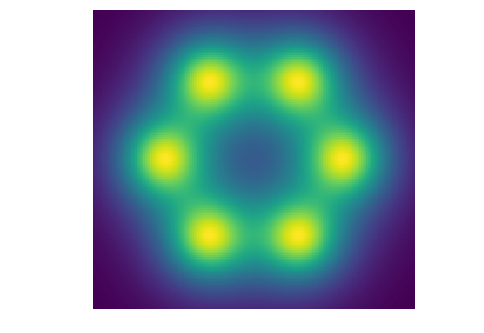

In [319]:
# Finalmente, graficamos los orbitales pi del benceno
# Para cambiar el orbital, cambia el numero aqui abajo y corre otra vez la celda
# En el benceno hallamos 6 niveles de energia
# Entonces hay orbitales del 0 al 5
orbital2D(benceno_coords, v, orbital=0)

Este momento es para detenerse y reflexionar: ¿Qué acabamos de hacer? Con una simple **función** y un poco de **álgebra de matrices** acabamos de encontrar la ubicación de los electrones que se hallan en resonancia en el benceno. No solo eso, ¡hallamos cómo se comportan a diferentes niveles de energía! Es importante recordar que solo estamos hablando de los electrones en los orbitales $\pi$. Sin embargo, esto ya complementa la intuición química sobre el comportamiento de los electrones en moléculas con resonancia.

Otras observaciones que quizá vale la pena mencionar, a pesar de que no son tema de esta práctica directamente son las siguientes:
1. Aquellos orbitales que tienen la misma energía (i.e. el mismo valor propio) son llamados *degenerados*
2. Los orbitales negativos de mayor energía son llamados **orbitales moleculares ocupados de más energía**, u **HOMO** por sus siglas en inglés.
3. Los orbitales positivos de menor energía son llamados **orbitales moleculares desocupados de menor energía**, u **LUMO** por sus siglas en inglés.
4. Es conveniente poner atención a las simetrías que se presentan entre los orbitales degenerados. Los planos de simetría suelen ser peculiares cuando se trata de este tipo de orbital.

---

Ahora que ya hemos visto cómo hacer esto para el benceno, vamos a repetir el mismo ejercicio con el naftaleno, el estireno, el azuleno o el coroneno. **¡Solo es necesario hacer uno!**

El procedimiento se desarrollará de la siguiente manera:
* Crear la matriz de Hückel de 0s y 1s
* Factorizar la matriz en Q y R
* Encontrar los valores propios utilizando el algoritmo QR
* Encontrar los valores y vectores propios utilizando la función de NumPy: `LA.eigh()`
* Graficar los orbitales utilizando la función `orbital2D()`
* Guardar el cuaderno interactivo e imprimir un PDF del mismo

|Azuleno|Coroneno|Estireno|Naftaleno
|---|---|---|---|
|![Azuleno](https://github.com/zronyj/matematica/blob/master/azuleno.png?raw=true)|![Coroneno](https://github.com/zronyj/matematica/blob/master/coroneno.png?raw=true)|![Estireno](https://github.com/zronyj/matematica/blob/master/estireno.png?raw=true.png)|![Naftaleno](https://github.com/zronyj/matematica/blob/master/naftaleno.png?raw=true)|

In [0]:
# Coordenadas para las moleculas
azuleno_coords = [[-1.21800105,-3.02633781,0],[-0.0819981,-3.97084248,0],
                  [1.21800105,-3.02633781,0],[0.72144557,-1.49809715,0],
                  [-0.72144557,-1.49809715,0],[-1.62107347,-0.37,0],
                  [-1.3,1.0367154,0],[0,1.6627624,0],
                  [1.3,1.0367154,0],[1.62107347,-0.37,0]]
coroneno_coords = [[0,2.6,0],[-2.2517,1.3,0],[-2.2517,-1.3,0],
                   [0,-2.6,0],[2.2517,-1.3,0],[2.2517,1.3,0],
                   [-4.5033,2.6,0],[-6.7551,1.3,0],[-6.7551,-1.3,0],
                   [-4.5033,-2.6,0],[4.5033,2.6,0],[4.5033,-2.6,0],
                   [6.7551,-1.3,0],[6.7551,1.3,0],[2.2517,6.5,0],
                   [0,5.2,0],[4.5033,5.2,0],[-2.2517,6.5,0],
                   [-4.5033,5.2,0],[-4.5033,-5.2,0],[-2.2517,-6.5,0],
                   [0,-5.2,0],[2.2517,-6.5,0],[4.5033,-5.2,0]]
estireno_coords = [[-2.2517,2.6,0],[-4.5033,1.3,0],[-4.5033,-1.3,0],
                   [-2.2517,-2.6,0],[0,-1.3,0],[0,1.3,0],
                   [2.2517,2.6,0],[4.5033,1.3,0]]
naftaleno_coords = [[-2.2517,2.6,0],[-4.5033,1.3,0],[-4.5033,-1.3,0],
                    [-2.2517,-2.6,0],[0,-1.3,0],[0,1.3,0],
                    [2.2517,2.6,0],[2.2517,-2.6,0],[4.5033,-1.3,0],
                    [4.5033,1.3,0]]